# PRÁCTICA TECNOLOGÍAS DE GESTIÓN DE LA INFORMACIÓN

Práctica hecha por:
 - Mendorito
 - Jesi
 
Esto es un texto de **prueba** para _ver_ cómo va este _**texto**_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electricity_prices = pd.read_csv("electricity_prices_household.csv", delimiter=";")
electricity_prices.shape

#tomamos solo las filas que contengan lo que nos interesa: datos de españa, precios sin tasas añadidas y el precio representado en euros
es_electricity = electricity_prices.loc[(electricity_prices['geo\\time'] == 'ES') & (electricity_prices['tax'] == 'X_TAX') & (electricity_prices['currency'] == 'EUR')]


In [3]:
es_electricity.head()

,product,consom,unit,tax,currency,geo\time,2019S1,2018S2,2018S1,2017S2,...,2011S2,2011S1,2010S2,2010S1,2009S2,2009S1,2008S2,2008S1,2007S2,2007S1
139,6000,4161901,KWH,X_TAX,EUR,ES,0.5166,0.4485,0.4680,0.4479,...,0.3044,0.2890,0.2926,0.3174,0.2611,0.2540,0.2622,0.2455,0.2424,:
520,6000,4161902,KWH,X_TAX,EUR,ES,0.2355,0.2393,0.2303,0.2113,...,0.1870,0.1768,0.1681,0.1622,0.1571,0.1459,0.1475,0.1299,0.1332,:
901,6000,4161903,KWH,X_TAX,EUR,ES,0.1889,0.1947,0.1873,0.1712,...,0.1684,0.1597,0.1492,0.1417,0.1381,0.1294,0.1277,0.1124,0.1152,:
1282,6000,4161904,KWH,X_TAX,EUR,ES,0.1608,0.1697,0.1513,0.1482,...,0.1563,0.1426,0.1363,0.1271,0.1266,0.1203,0.1219,0.1021,0.1058,:
1663,6000,4161905,KWH,X_TAX,EUR,ES,0.1409,0.1414,0.1236,0.1311,...,0.1444,0.1251,0.1244,0.1174,0.1153,0.1163,0.1148,0.0981,0.0976,:


In [4]:
# eliminamos la columna correspondiente al primer semestre de 2007,
# ya que no hay datos de esa época
es_electricity = es_electricity.drop(columns="2007S1")

# le damos la vuelta porque los años están dispuestos del revés
# generamos la x que pondremos abajo en nuestra gráfica
x = np.flip(es_electricity.columns[6:].to_numpy())

# convertimos el DataFrame de pandas a un numpy array para manipularlo más fácilmente
nparray = es_electricity.to_numpy()

# hacemos lo mismo que con la x, pero con la y
y1 = np.flip(nparray[0, 6:])
y2 = np.flip(nparray[1, 6:])
y3 = np.flip(nparray[2, 6:])
y4 = np.flip(nparray[3, 6:])
y5 = np.flip(nparray[4, 6:])

# el siguiente paso es castearlos a un tipo flotante,
# así que nos aseguramos de que los valores no numéricos
# no existan

y1[y1 == ': '] = -1
y2[y2 == ': '] = -1
y3[y3 == ': '] = -1
y4[y4 == ': '] = -1
y5[y5 == ': '] = -1

# convertimos el array a float, ya que hasta ahora era
# un array de strings
y1 = y1.astype(float)
y2 = y2.astype(float)
y3 = y3.astype(float)
y4 = y4.astype(float)
y5 = y5.astype(float)


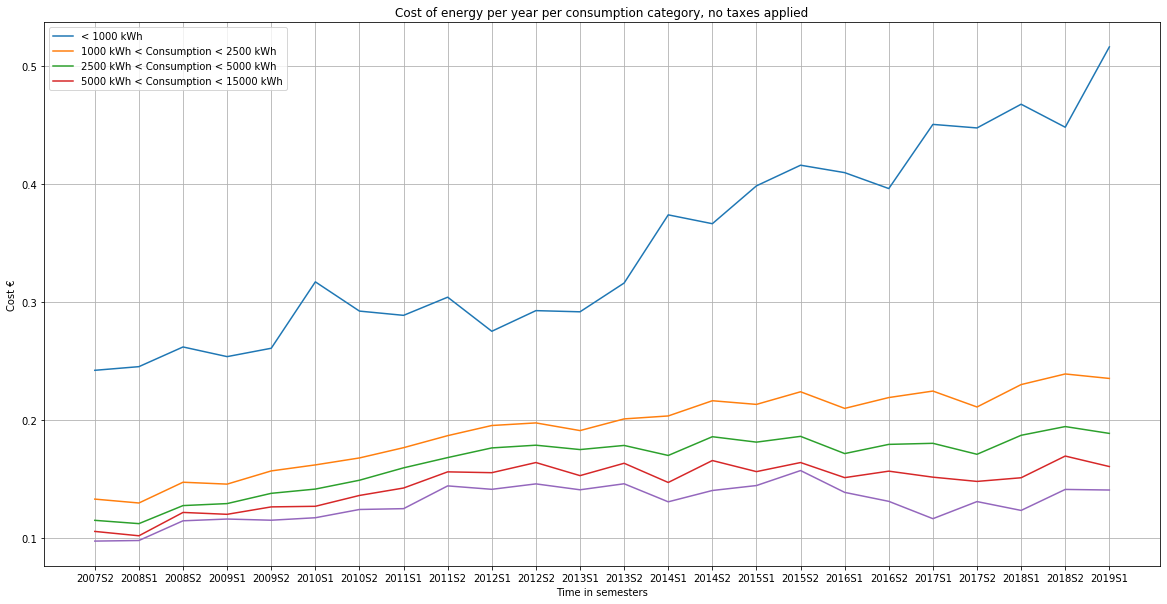

In [5]:
plt.figure(figsize=(20,10))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)

legend = ["< 1000 kWh", "1000 kWh < Consumption < 2500 kWh","2500 kWh < Consumption < 5000 kWh","5000 kWh < Consumption < 15000 kWh",]
plt.legend(legend)

plt.ylabel('Cost €')
plt.xlabel('Time in semesters')

plt.title("Cost of energy per year per consumption category, no taxes applied")
plt.grid(True)
plt.show()

In [6]:
elec_melt = electricity_prices.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='semester',
    value_name='cost'
)

elec_melt.head()

,product,consom,unit,tax,currency,geo\time,semester,cost
0,6000,4161901,KWH,I_TAX,EUR,AL,2019S1,:
1,6000,4161901,KWH,I_TAX,EUR,AT,2019S1,0.3796
2,6000,4161901,KWH,I_TAX,EUR,BA,2019S1,0.2090
3,6000,4161901,KWH,I_TAX,EUR,BE,2019S1,0.4742
4,6000,4161901,KWH,I_TAX,EUR,BG,2019S1,0.1014


In [7]:
es_melt = elec_melt[elec_melt['geo\\time'] == 'ES']
es_melt.head()

,product,consom,unit,tax,currency,geo\time,semester,cost
12,6000,4161901,KWH,I_TAX,EUR,ES,2019S1,0.6570
56,6000,4161901,KWH,I_TAX,NAT,ES,2019S1,0.6570
100,6000,4161901,KWH,I_TAX,PPS,ES,2019S1,0.7183
139,6000,4161901,KWH,X_TAX,EUR,ES,2019S1,0.5166
183,6000,4161901,KWH,X_TAX,NAT,ES,2019S1,0.5166


In [8]:
renewable = pd.read_csv("share_renewable.csv");
renewable.head()

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Renewable energy sources,Percentage,11.325,NaN
1,2008,Belgium,Renewable energy sources,Percentage,3.591,NaN
2,2008,Bulgaria,Renewable energy sources,Percentage,10.492,NaN
3,2008,Czechia,Renewable energy sources,Percentage,8.626,NaN
4,2008,Denmark,Renewable energy sources,Percentage,18.564,NaN


In [9]:
es_renewable = renewable[renewable['GEO'] == 'Spain']
es_renewable.head()

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
9,2008,Spain,Renewable energy sources,Percentage,10.737,NaN
46,2009,Spain,Renewable energy sources,Percentage,12.963,NaN
83,2010,Spain,Renewable energy sources,Percentage,13.810,NaN
120,2011,Spain,Renewable energy sources,Percentage,13.224,NaN
157,2012,Spain,Renewable energy sources,Percentage,14.286,NaN


In [10]:
x = es_renewable.TIME
y = es_renewable.Value

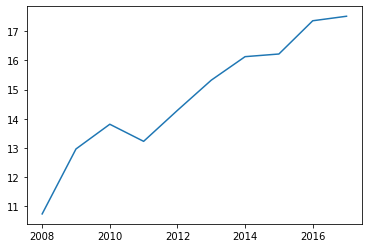

In [11]:
plt.plot(x, y)
plt.show()

In [12]:
supply_consumption = pd.read_csv("supply_consumption_renewables.csv")
supply_consumption.head()

,TIME,GEO,NRG_BAL,SIEC,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Inland consumption - calculated,Geothermal,Terajoule,235 262.865,NaN
1,2008,European Union - 28 countries,Inland consumption - calculated,Solar thermal,Terajoule,46 004.286,NaN
2,2008,European Union - 28 countries,Inland consumption - calculated,Primary solid biofuels,Terajoule,3 268 114.691,NaN
3,2008,European Union - 28 countries,Inland consumption - calculated,Biogases,Terajoule,280 015.181,NaN
4,2008,European Union - 28 countries,Inland consumption - calculated,Renewable municipal waste,Terajoule,303 233.213,NaN


In [13]:
es_supply = supply_consumption[supply_consumption['GEO'] == 'Spain']
es_supply.head()

,TIME,GEO,NRG_BAL,SIEC,UNIT,Value,Flag and Footnotes
50,2008,Spain,Inland consumption - calculated,Geothermal,Terajoule,459.000,NaN
51,2008,Spain,Inland consumption - calculated,Solar thermal,Terajoule,5 378.234,NaN
52,2008,Spain,Inland consumption - calculated,Primary solid biofuels,Terajoule,176 143.000,NaN
53,2008,Spain,Inland consumption - calculated,Biogases,Terajoule,8 660.000,NaN
54,2008,Spain,Inland consumption - calculated,Renewable municipal waste,Terajoule,13 735.000,NaN


In [14]:
es_supply = es_supply.reset_index()
categories = es_supply.SIEC

In [15]:
categories.head()

0                   Geothermal
1                Solar thermal
2       Primary solid biofuels
3                     Biogases
4    Renewable municipal waste
Name: SIEC, dtype: object

In [16]:
categories = categories.drop_duplicates()

In [17]:
categories

0                   Geothermal
1                Solar thermal
2       Primary solid biofuels
3                     Biogases
4    Renewable municipal waste
Name: SIEC, dtype: object

In [18]:
x = es_supply.TIME
x = x.drop_duplicates()

- Formateamos las celdas para que sean de tipo flotante:

In [19]:
yGeo = es_supply[es_supply['SIEC'] == categories.get(0)].Value
yGeo = yGeo.astype(float)

ySol = es_supply[es_supply['SIEC'] == categories.get(1)].Value
ySol = (ySol.str.replace(" ", "")).astype(float)

yBio = es_supply[es_supply['SIEC'] == categories.get(2)].Value
yBio = (yBio.str.replace(" ", "")).astype(float)

yGas = es_supply[es_supply['SIEC'] == categories.get(3)].Value
yGas = (yGas.str.replace(" ", "")).astype(float)

yWaste = es_supply[es_supply['SIEC'] == categories.get(4)].Value
yWaste = (yWaste.str.replace(" ", "")).astype(float)

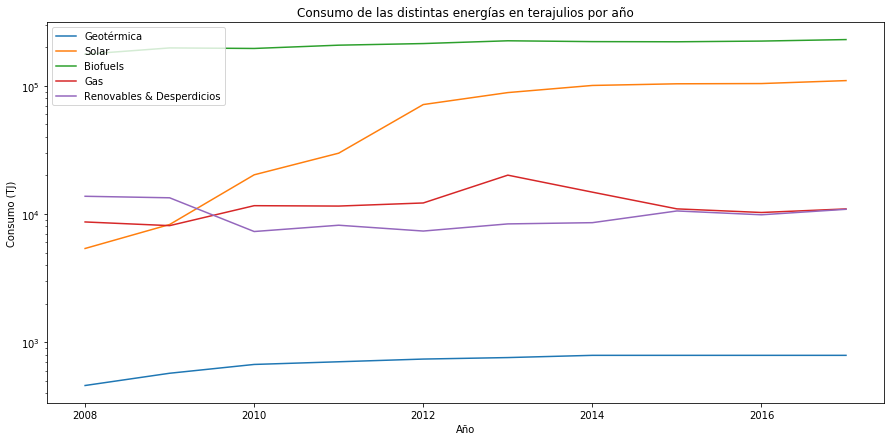

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(x, yGeo, x, ySol, x, yBio, x, yGas, x, yWaste)
plt.xlabel('Año')
plt.ylabel('Consumo (TJ)')
plt.title('Consumo de las distintas energías en terajulios por año')
plt.yscale('log')
plt.legend(['Geotérmica', 'Solar', 'Biofuels', 'Gas', 'Renovables & Desperdicios'])
plt.show()